## **Load Libraries and Dataset**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, RandomForestClassifier, BaggingClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [16]:
url = 'https://raw.githubusercontent.com/stevanusfebrian/ph-dataset/main/ph-data.csv'
df = pd.read_csv(url)

In [17]:
df.head()

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4


In [18]:
df.tail()

,blue,green,red,label
648,201,123,0,10
649,203,51,46,11
650,169,62,48,12
651,173,37,79,13
652,131,2,77,14


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   blue    653 non-null    int64
 1   green   653 non-null    int64
 2   red     653 non-null    int64
 3   label   653 non-null    int64
dtypes: int64(4)
memory usage: 20.5 KB


In [20]:
df['label'].value_counts()

1     44
2     44
3     44
4     44
5     44
6     44
7     44
8     44
9     44
10    44
11    44
12    44
14    44
13    43
0     38
Name: label, dtype: int64

Setiap label memiliki 44 data yang dapat digunakan. Karena itu sangat sedikit, kami akan mengubah klasifikasi antara ph "asam kuat"/"Strong Acidic, "Asam Lemah"/"Weak Acidic", "Basa Lemah"/"Weak Alkaline", dan "Basa Kuat"/"Strong Alkaline" dengan mengubah: label dari nilai 0-3 menjadi "Strong Acidic", lalu label 4-6 adalah "Weak Acidic", label 8-10 menjadi "Weak Alkaline", dan label bernilai 11-14 menjadi "Strong Alkaline"

In [21]:
df['label'] = df['label'].replace([0,1,2,3],'Strong Acidic')
df['label'] = df['label'].replace([4,5,6],'Weak Acidic')
df['label'] = df['label'].replace([7],'Neutral')
df['label'] = df['label'].replace([8,9,10],'Weak Alkaline')
df['label'] = df['label'].replace([11,12,13,14],'Strong Alkaline')

disini kami mengkategorikan nilai pH kedalam 5 bagian, yakni terdapat kategori 'Strong Acidic', 'Weak Acidic', 'Neutral', Weak Alkaline', 'Strong Alkaline'

In [22]:
df = df[df.label != 'Neutral']

kami menghapus label 'neutral' karena kami tidak memerlukan label ini, untuk mencapai tujuan kita yaitu menentukan kuat lemah dari asam atau basa.

dapat dilihat count dari asam dan basa kuat lebih banyak daripada count asam dan basa lemah

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 0 to 652
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   blue    609 non-null    int64 
 1   green   609 non-null    int64 
 2   red     609 non-null    int64 
 3   label   609 non-null    object
dtypes: int64(3), object(1)
memory usage: 23.8+ KB


In [24]:
df['label'].value_counts()

Strong Alkaline    175
Strong Acidic      170
Weak Acidic        132
Weak Alkaline      132
Name: label, dtype: int64

setelah mengubah dan mengdrop data yang bernilai 'Neutral', kolom label sudah menjadi object, dan terdapat 44 baris data yang terhapus karena bernilai 'Neutral'

In [25]:
print(df.isnull().sum())

blue     0
green    0
red      0
label    0
dtype: int64


tidak terdapat missing value pada semua kolom dalam dataset yang digunakan.

# **Descriptive Statistics**

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
blue,609.0,92.623974,76.008341,0.0,24.0,72.0,164.0,255.0
green,609.0,126.924466,73.728281,0.0,64.0,143.0,190.0,255.0
red,609.0,125.525452,89.480866,0.0,56.0,97.0,229.0,255.0


nilai dari ketiga warna memiliki persebaran yang berbeda-beda, namun dapat dipastikan nilai minimum dan maximum ketiga warna adalah 0 dan 255.

# **Analysis Label**

In [27]:
df['label'] = [1 if x == 'Strong Acidic' else 2 if x == 'Weak Acidic' else 3 if x == 'Weak Alkaline' else 4 for x in df['label']]# Separate feature variables and target variable

In [28]:
df['label'].value_counts()

4    175
1    170
2    132
3    132
Name: label, dtype: int64

kategori dari label sudah berhasil diubah menjadi angka dan dapat digunakan untuk klasifikasi, dan tidak terdapat error saat perubahan data yang ditunjukkan dengan jumlah counts yang sama seperti sebelumnya.

# **Checking Outliers**

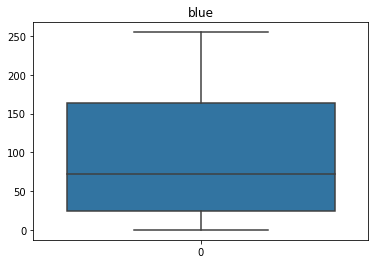

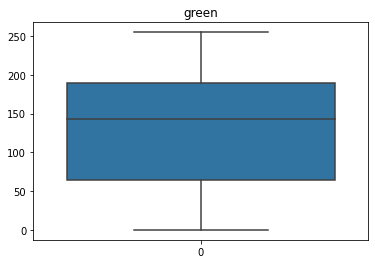

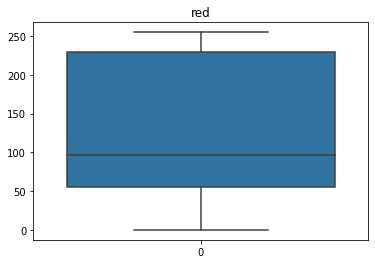

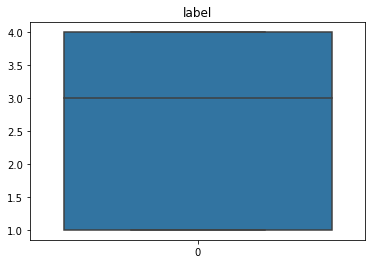

In [29]:
for i in df.columns:
    sns.boxplot(data= df[i])
    plt.title(i)
    plt.show()

Tidak ditemukan adanya outlier pada dataset ketika menggunakan barplot untuk mengecek outliers

# **Desnity Plot**

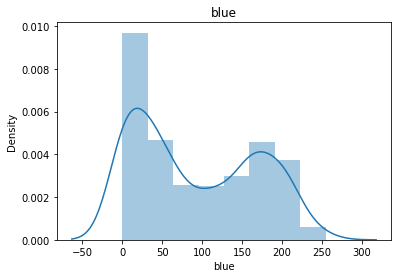

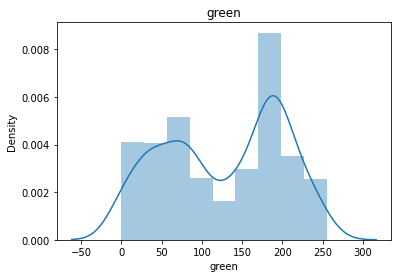

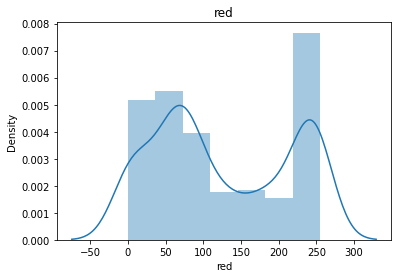

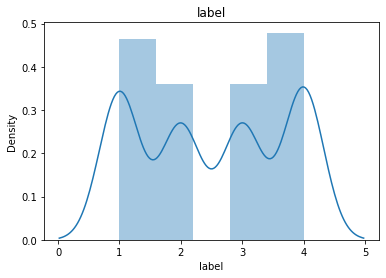

In [30]:
for i in df.columns:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

dari distribusi diatas, setiap warna memiliki distribusi value Lightness berbeda-beda yang berkisar antara 0-255. Jika value Lightness-nya 0, maka warnanya akan hitam, dan jika valuenya semakin naik maka Lightnessnya semakin terang.

Hal tersebut berarti:
- banyak warna 'blue' yang berwarna gelap
- 'red' banyak yang berwarna merah pekat
- dan 'green' banyak yang berwarna hijau yang cukup pekat

contoh: jika pada 'Red' valuenya 0, maka red tersebut akan berwarna hitam, jika valuenya 255, maka akan menghasilkan warna merah pekat.

Dan label Strong Acidic dan Strong Alkaline lebih banyak dibandingkan Weak Acidic dan Weak Alkaline



# **Correlation**

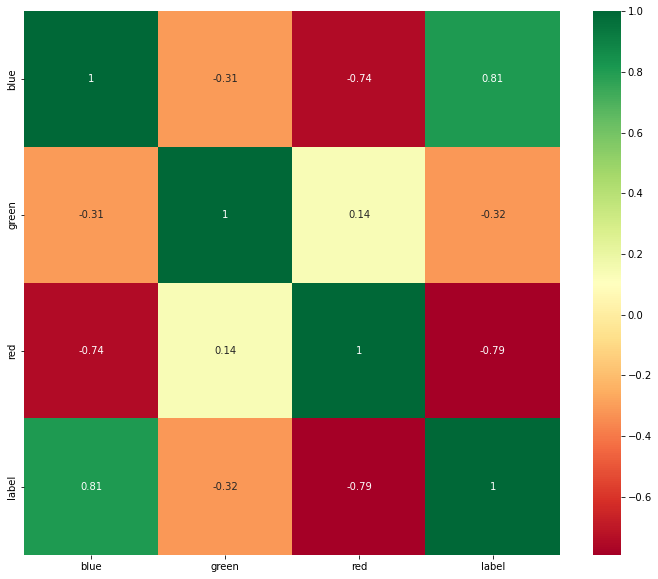

In [31]:
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn') 

- `blue` memiliki strong positive correlation
- `red` punya strong negative correlation 
- `green` memiliki weak negative correlation

hal ini masuk akal, jika semakin tinggi value `blue`, maka semakin kuat pH alkalinenya, dengan label alkaline berada di nilai 3 dan 4.

Berlaku sebaliknya untuk `red` dengan negative correlationnya, jika semakin tinggi value `red`, maka semakin rendah nilai label (1 dan 2) yang berarti pH-nya semakin asam.

Namun correlation dari `green` dengan output `label` tidak sekuat `blue` dan `red`.

# **Splitting Dataset**

In [32]:
X = df.drop(['label'], axis = 1)
y = df['label']

In [33]:
X.head()

,blue,green,red
0,36,27,231
1,36,84,250
2,37,164,255
3,22,205,255
4,38,223,221


In [34]:
y.head()

0    1
1    1
2    1
3    1
4    2
Name: label, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=43)

kami membagi dataset dengan perbandingan 30% untuk test dan 70% untuk training dari data output sudah di assign ke variabel y, dan sisanya sudah diassign ke variabel X.

# **Training Machine Learning Models**

Kami akan menggunakan beberapa algoritma untuk membandingkan model apa yang terbaik. Dan memamkai Classification Report dan Confusion Matrix untuk mengevaluasi tiap model

In [44]:
knn = KNeighborsClassifier()
knnModel = knn.fit(X_train,y_train)
knnPred = knn.predict(X_test)
print(classification_report(y_test,knnPred))
print(confusion_matrix(y_test, knnPred))

              precision    recall  f1-score   support

           1       0.89      0.95      0.92        44
           2       0.86      0.88      0.87        41
           3       0.88      0.83      0.85        35
           4       0.97      0.94      0.95        63

    accuracy                           0.91       183
   macro avg       0.90      0.90      0.90       183
weighted avg       0.91      0.91      0.91       183

[[42  2  0  0]
 [ 5 36  0  0]
 [ 0  4 29  2]
 [ 0  0  4 59]]


In [37]:
dt = DecisionTreeClassifier()
dtModel = dt.fit(X_train,y_train)
dtPred = dt.predict(X_test)
print(classification_report(y_test,dtPred))
print(confusion_matrix(y_test, dtPred))

              precision    recall  f1-score   support

           1       0.89      0.95      0.92        44
           2       0.88      0.73      0.80        41
           3       0.74      0.83      0.78        35
           4       0.94      0.94      0.94        63

    accuracy                           0.87       183
   macro avg       0.86      0.86      0.86       183
weighted avg       0.88      0.87      0.87       183

[[42  2  0  0]
 [ 5 30  6  0]
 [ 0  2 29  4]
 [ 0  0  4 59]]


In [38]:
svm = SVC()
svmModel = svm.fit(X_train,y_train)
svmPred = svm.predict(X_test)
print(classification_report(y_test,svmPred))
print(confusion_matrix(y_test, svmPred))

              precision    recall  f1-score   support

           1       0.88      1.00      0.94        44
           2       0.89      0.83      0.86        41
           3       0.85      0.83      0.84        35
           4       0.97      0.94      0.95        63

    accuracy                           0.91       183
   macro avg       0.90      0.90      0.90       183
weighted avg       0.91      0.91      0.91       183

[[44  0  0  0]
 [ 6 34  1  0]
 [ 0  4 29  2]
 [ 0  0  4 59]]


In [39]:
estimators = [('svm',svm), ('KNN',knn), ('DecisionTree',dt)]
ensemble = VotingClassifier(estimators, voting = 'hard')
ensembleModel = ensemble.fit(X_train,y_train)
ensemblePred = ensemble.predict(X_test)
print(classification_report(y_test, ensemblePred))
print(confusion_matrix(y_test, ensemblePred))

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        44
           2       0.90      0.85      0.88        41
           3       0.85      0.83      0.84        35
           4       0.97      0.94      0.95        63

    accuracy                           0.91       183
   macro avg       0.90      0.90      0.90       183
weighted avg       0.91      0.91      0.91       183

[[44  0  0  0]
 [ 5 35  1  0]
 [ 0  4 29  2]
 [ 0  0  4 59]]


In [40]:
start = time.time()
param_dist = {'max_depth': [2,3,4],
             'bootstrap': [True,False],
             'max_features': ['auto','sqrt','log2',None],
             'criterion': ['gini','entropy']}

fit_rf = RandomForestClassifier()
cv_rf = GridSearchCV(fit_rf, cv = 10, param_grid = param_dist, n_jobs = 3)

rfModel = cv_rf.fit(X_train,y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end -start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None}
Time taken in grid search:  56.68


In [41]:
rfPred = cv_rf.predict(X_test)
print(classification_report(y_test,rfPred))
print(confusion_matrix(y_test, rfPred))

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        44
           2       0.95      0.88      0.91        41
           3       0.89      0.89      0.89        35
           4       0.97      0.94      0.95        63

    accuracy                           0.93       183
   macro avg       0.92      0.93      0.92       183
weighted avg       0.93      0.93      0.93       183

[[44  0  0  0]
 [ 5 36  0  0]
 [ 0  2 31  2]
 [ 0  0  4 59]]


In [42]:
adaBoost = AdaBoostClassifier()
abModel = adaBoost.fit(X_train,y_train)
abPred = adaBoost.predict(X_test)
print(classification_report(y_test, abPred))
print(confusion_matrix(y_test, abPred))

              precision    recall  f1-score   support

           1       0.54      1.00      0.70        44
           2       0.57      0.10      0.17        41
           3       0.35      0.86      0.50        35
           4       1.00      0.13      0.23        63

    accuracy                           0.47       183
   macro avg       0.61      0.52      0.40       183
weighted avg       0.67      0.47      0.38       183

[[44  0  0  0]
 [36  4  1  0]
 [ 2  3 30  0]
 [ 0  0 55  8]]


In [43]:
bc = BaggingClassifier()
bcModel = bc.fit(X_train, y_train)
bcPred = bc.predict(X_test)
print(classification_report(y_test, bcPred))
print(confusion_matrix(y_test, bcPred))

              precision    recall  f1-score   support

           1       0.91      0.95      0.93        44
           2       0.89      0.76      0.82        41
           3       0.73      0.86      0.79        35
           4       0.95      0.92      0.94        63

    accuracy                           0.88       183
   macro avg       0.87      0.87      0.87       183
weighted avg       0.89      0.88      0.88       183

[[42  2  0  0]
 [ 4 31  6  0]
 [ 0  2 30  3]
 [ 0  0  5 58]]


## Results

kami menggunakan beberapa algoritma machine learning, yaitu: Decision Tree, KNN, SVM, Ensemble Learning, Random Forest with Grid Search, adaBoost, Bagging Classifier. Dari training yang dilakukan, model dengan algoritma KNN dan Random Forest with Grid Search adalah model terbaik untuk permasalahan kami.

dengan pembahasan antara KNN dan Random Forest sebagai berikut:
- model dengan Random Forest memiliki nilai lebih tinggi secara keseluruhan dibandingkan KNN

- Komputasi yang cepat oleh KNN sebenarnya pun menghasilkan performa yang dapat dibilang bagus walau tidak setinggi Random Forest dengan komputasi lebih lama

- ‘Weak Alkaline’ memiliki misklasifikasi terbanyak


## Conclusion

Dari kedua model, yaitu KNN dan Random Forest dengan Grid Search sama-sama memiliki precision, recall, dan accuracy yang baik untuk mengklasifikasikan label dari nilai pH, dengan performa model Random Forest lebih tinggi secara keseluruhan dibandingkan performa KNN.

Dengan goal untuk mengklasifikan nilai pH dengan RGB value dengan tepat, memilih Random Forest dengan Grid Search adalah model machine learning yang terbaik untuk menyelesaikan masalah ini. Dan nilai recall yang tinggi oleh Random Forest menunjukkan model ini dapat mengkategorikan pH dengan baik.

Dan menurut kami model Random Forest kami sudah baik, tidak diperlukan pemrosesan lebih lanjut seperti fine tuning.